<a href="https://www.kaggle.com/code/thiagomustasheep/amazon-reviews-eda?scriptVersionId=235317640" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objetivo

Este projeto faz parte do curso de GenAI com AI para engenheiros, e meu objetivo será responder as seguintes questões:

* Existem outliers ou dados inconsistentes no dataset?
* Qual é a distribuição de sentimentos/categorias no dataset?
* Existe desbalanceamento?
* Qual é o tamanho médio dos documentos (em palavras ou caracteres)?

In [1]:
# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

# Carregando bibliotecas...
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

# Baixando o dataset
try:
    path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
    print("Dataset baixado com sucesso.")
    
except Exception as e:
    print(f"Erro no download: {e}")

Dataset baixado com sucesso.


In [2]:
# Carregando os dados...
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df = pd.DataFrame(data)

print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 568454
Quantidade de colunas: 10


In [3]:
df.info()
print('\n')
df.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...


Podemos notar que possuem poucos dados ausentes em um dataset bem grande. Mas mesmo assim vamos lidar com a ausência desses dados.

In [4]:
print(f"Quantidade de valores nulos:\n\n{df.isna().sum()}")

Quantidade de valores nulos:

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
df[df['ProfileName'].isna() | df['Summary'].isna()].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10616,10617,B002DHN956,A1LSYR30XW7CFT,NaN,1,2,5,1291680000,Awesome,This is 72 for the price of like 24 at the gro...
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


Pode-se observar que os dados são de colunas sem grande importância ao dataset. Em `Profilename` podemos ver o nome de usuário do dono da publicação do comentário. E em `Summary` um pequeno resumo ou título para seu comentário. Para lidar com a ausência, irei indicar que o dado está vazio com `Unknow`.

In [6]:
df = df.fillna('Unknow')

In [7]:
print(f"Quantidade de valores nulos:\n\n{df.isna().sum()}")

Quantidade de valores nulos:

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


As colunas numéricas não trazem dados para fins estatísticos, são apenas valores representativos e categóricos. Deste modo, agora podemos ter certeza de quais colunas serão necessárias para o nosso projeto. A seguir, irei remover as colunas desnecessárias.

In [9]:
dados_desnecessarios = ['Id', 'ProductId', 'UserId','Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator']
df.drop(dados_desnecessarios, axis=1, inplace=True)
df.head()

,ProfileName,Score,Summary,Text
0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
# Obsevando a quantidade de cada Score no dataset

df_score = df.groupby(['Score']).size().reset_index(name='Count').sort_values(by='Score', ascending=False)

total_contagens = df_score['Count'].sum()
df_score['Percentage'] = (df_score['Count'] / total_contagens) * 100
df_score['Percentage'] = df_score['Percentage'].round(2)
df_score

,Score,Count,Percentage
4,5,363122,63.88
3,4,80655,14.19
2,3,42640,7.50
1,2,29769,5.24
0,1,52268,9.19


In [11]:
# Preparando métricas para plotagem

cores = ['#d62828', '#ff9e00', '#eeef20', '#aacc00', '#55a630']
score = df_score['Score']
contagem = df_score['Count']

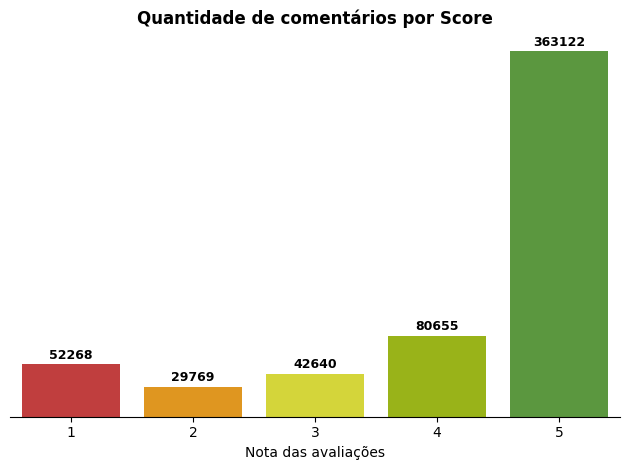

In [12]:
# Gráfico de barras do Score
ax = sns.barplot(x=score,
           y=contagem,
           palette=cores)

for i in range(len(score)):
    ax.annotate(f"{contagem[i]:.0f}".replace('.', ','),
               (i, contagem[i]),
                ha="center",
                xytext=(0, 4),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold")

ax.set_title("Quantidade de comentários por Score", fontsize=12, fontweight="bold")
ax.set_xlabel("Nota das avaliações")

ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()

É evidente o desbalanceamento dos dados através da contagem do score das avaliações. O que é bom pois temos uma grande margem de clientes satisfeitos e felizes com suas transações na Amazon. Por outro lado, para uma análise de sentimento isso seria um desafio e seriam necessárias o uso de técnicas avançadas para lidar com o desbalanceamento. 

In [13]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Text'].apply(get_sentiment)

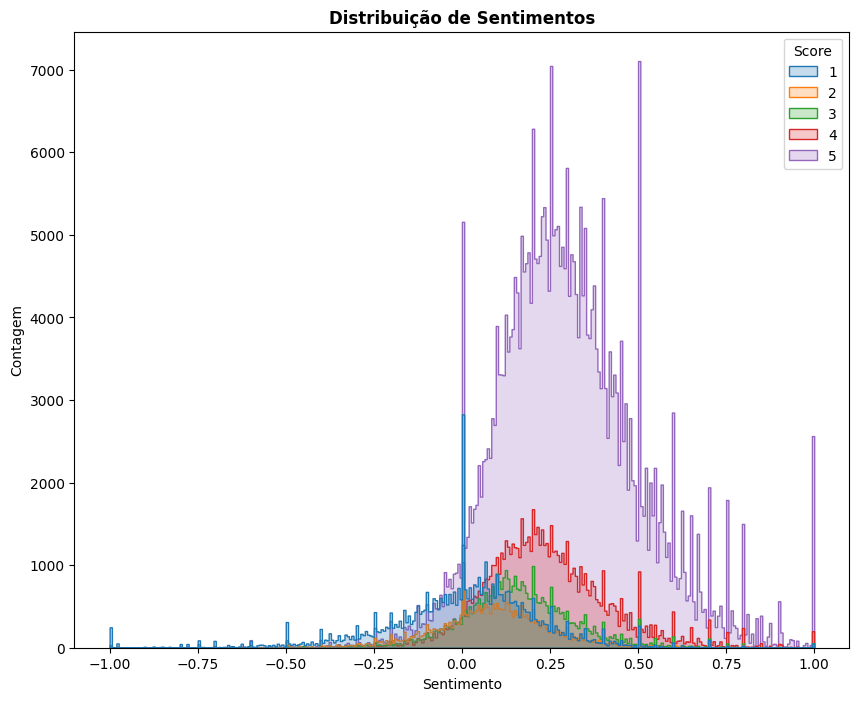

In [14]:
plt.figure(figsize=(10,8))
ax = sns.histplot(df, x="Sentiment",
                  palette="tab10",
                  hue="Score",
                  element="step")

ax.set_title("Distribuição de Sentimentos", fontweight='bold')
ax.set_ylabel("Contagem")
ax.set_xlabel("Sentimento")

plt.show()

A maioria dos comentários possuem uma polaridade positiva, incluindo até as menores avaliações. Por mais que não sejam extremamente positivos, eles expressam uma opinião ou emoção favorável, mas não de forma intensa. Os textos contém elementos positivos e neutros, com uma ligeira predominância dos positivos.

In [15]:
# Contando a quantidade de caracteres e palavras dos comentários
total_chars = df['Text'].str.replace(' ', '').str.len()
total_palavras = df['Text'].str.split().str.len()

In [16]:
print(f"Média de caracteres dos comentários: {total_chars.mean():.0f}")
print(f"Média de palavras dos comentários: {total_palavras.mean():.0f}")

Média de caracteres dos comentários: 355
Média de palavras dos comentários: 80


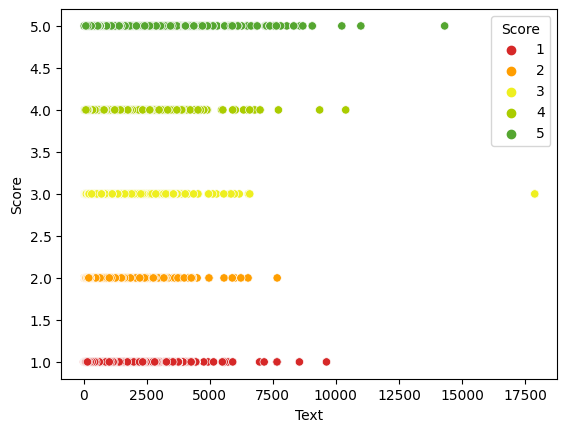

In [17]:
sns.scatterplot(x=total_chars, y=df['Score'], hue=df['Score'], palette=cores)
plt.show()

Uma curiosidade que pode-se notar: em comentários positivos, a maioria dos usuários costumam digitar e se expressar mais. Isso não é uma afirmação verídica por conta do desbalanceamento dos dados, mas podemos ter uma noção prévia usando como base o score `4` ao `1`

# Conclusão

* O dataset possui cerca de 560 mil amostras em 10 categorias, sendo que as categorias numéricas em sua maioria não são úteis para este projeto, com exceção da coluna `Score`.

* Os comentários são longos em sua maioria, estando na média de 80 palavras nos comentários com cerca de 355 caracteres.

* Existe um grande desbalanceamento das amostras em relação às avaliações do clientes, que são definidas pelo `Score`, sendo 63,88% avaliações de score `5` 